In [56]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sbn
import altair

In [2]:
df = pd.read_excel('chapter-12-relay-foods.xlsx')

In [3]:
def period(date):
    return date.strftime(('%Y-%m'))

In [4]:
df['Period'] = df['OrderDate'].map(period)

In [5]:
df.set_index('UserId',inplace=True)

In [6]:
df['cohort'] = df.groupby(level=0)['Period'].min()

In [7]:
df['OrderPeriod'] = df['OrderDate'].map(period)

In [8]:
df.head(100)

,OrderId,OrderDate,TotalCharges,CommonId,PupId,PickupDate,Period,cohort,OrderPeriod
UserId,,,,,,,,,
47,262,2009-01-11,50.6700,TRQKD,2,2009-01-12,2009-01,2009-01,2009-01
47,278,2009-01-20,26.6000,4HH2S,3,2009-01-20,2009-01,2009-01,2009-01
47,294,2009-02-03,38.7100,3TRDC,2,2009-02-04,2009-02,2009-01,2009-02
47,301,2009-02-06,53.3800,NGAZJ,2,2009-02-09,2009-02,2009-01,2009-02
47,302,2009-02-06,14.2800,FFYHD,2,2009-02-09,2009-02,2009-01,2009-02
47,321,2009-02-17,29.5000,HA5R3,3,2009-02-17,2009-02,2009-01,2009-02
47,333,2009-02-23,18.9100,RSXQG,2,2009-02-23,2009-02,2009-01,2009-02
47,341,2009-03-01,64.4100,KHBDJ,3,2009-03-03,2009-03,2009-01,2009-03
47,353,2009-03-09,18.0300,T7SUN,3,2009-03-10,2009-03,2009-01,2009-03


In [9]:
#money spent by each cohort for each month
df = df.reset_index()

In [10]:
ndf = df.groupby(['cohort','OrderPeriod'])

In [11]:
newest = ndf.agg({'UserId': pd.Series.nunique,
                 'OrderId': pd.Series.nunique,
                 'TotalCharges': np.sum})
newest

TotalCharges  UserId  OrderId
cohort  OrderPeriod                               
2009-01 2009-01         1850.2550      22       30
        2009-02         1351.0650       8       25
        2009-03         1357.3600      10       26
        2009-04         1604.5000       9       28
        2009-05         1575.6250      10       26
        2009-06         1384.8400       8       26
        2009-07         1750.8400       8       24
        2009-08         1426.5714       7       21
        2009-09         1964.2755       7       24
        2009-10          860.3292       7       13
        2009-11         1821.8153       7       21
        2009-12         2152.1165       8       22
        2010-01         2084.2236      11       25
        2010-02         2068.7771       7       19
        2010-03         1504.3325       6       12
2009-02 2009-02          666.3100      15       15
        2009-03          501.6100       3        8
        2009-04          968.7800       5       10
        2009-05           53.3600       1        2
        2009-06          758.5200       4        9
        2009-07          667.1000       4       11
        2009-08          314.1752       4        6
        2009-09          567.5057       5       12
        2009-10          328.2800       5        7
        2009-11          738.9359       4        6
        2009-12          263.1971       3        5
        2010-01          550.0098       3        5
        2010-02          734.7613       5        9
2009-03 2009-03          806.3100      13       18
        2009-04          463.8000       4        6
...                           ...     ...      ...
2009-08 2010-02         1595.9906       4       12
        2010-03          478.7787       4        5
2009-09 2009-09         1953.0553      37       44
        2009-10         2433.3013      15       42
        2009-11         1953.2262      14       28
        2009-12         1371.3499       8       20
        2010-01         2262.0346      13       29
        2010-02         1842.9434       9       22
        2010-03          688.6822       8        9
2009-10 2009-10         3802.2525      54       70
        2009-11         1957.8872      17       37
        2009-12         2394.5338      12       27
        2010-01         1952.0574      13       28
        2010-02         1783.1022      13       30
        2010-03          546.0691       7        9
2009-11 2009-11         6738.5869     130      166
        2009-12         5107.4213      32       71
        2010-01         5046.8124      26       59
        2010-02         3486.0959      29       64
        2010-03          961.3681      13       17
2009-12 2009-12         4571.6911      65       88
        2010-01         2565.4410      17       39
        2010-02         1785.7853      18       28
        2010-03          534.0929       7        8
2010-01 2010-01         9677.9032      95      156
        2010-02         8453.1039      50      101
        2010-03         2238.6461      26       31
2010-02 2010-02         7374.7108     100      139
        2010-03          945.9633      19       19
2010-03 2010-03         1099.5471      24       26

[119 rows x 3 columns]

In [12]:
newest = newest.rename(columns={'OrderId':'TotalOrders','UserId':'TotalUsers'})
newest

TotalCharges  TotalUsers  TotalOrders
cohort  OrderPeriod                                       
2009-01 2009-01         1850.2550          22           30
        2009-02         1351.0650           8           25
        2009-03         1357.3600          10           26
        2009-04         1604.5000           9           28
        2009-05         1575.6250          10           26
        2009-06         1384.8400           8           26
        2009-07         1750.8400           8           24
        2009-08         1426.5714           7           21
        2009-09         1964.2755           7           24
        2009-10          860.3292           7           13
        2009-11         1821.8153           7           21
        2009-12         2152.1165           8           22
        2010-01         2084.2236          11           25
        2010-02         2068.7771           7           19
        2010-03         1504.3325           6           12
2009-02 2009-02          666.3100          15           15
        2009-03          501.6100           3            8
        2009-04          968.7800           5           10
        2009-05           53.3600           1            2
        2009-06          758.5200           4            9
        2009-07          667.1000           4           11
        2009-08          314.1752           4            6
        2009-09          567.5057           5           12
        2009-10          328.2800           5            7
        2009-11          738.9359           4            6
        2009-12          263.1971           3            5
        2010-01          550.0098           3            5
        2010-02          734.7613           5            9
2009-03 2009-03          806.3100          13           18
        2009-04          463.8000           4            6
...                           ...         ...          ...
2009-08 2010-02         1595.9906           4           12
        2010-03          478.7787           4            5
2009-09 2009-09         1953.0553          37           44
        2009-10         2433.3013          15           42
        2009-11         1953.2262          14           28
        2009-12         1371.3499           8           20
        2010-01         2262.0346          13           29
        2010-02         1842.9434           9           22
        2010-03          688.6822           8            9
2009-10 2009-10         3802.2525          54           70
        2009-11         1957.8872          17           37
        2009-12         2394.5338          12           27
        2010-01         1952.0574          13           28
        2010-02         1783.1022          13           30
        2010-03          546.0691           7            9
2009-11 2009-11         6738.5869         130          166
        2009-12         5107.4213          32           71
        2010-01         5046.8124          26           59
        2010-02         3486.0959          29           64
        2010-03          961.3681          13           17
2009-12 2009-12         4571.6911          65           88
        2010-01         2565.4410          17           39
        2010-02         1785.7853          18           28
        2010-03          534.0929           7            8
2010-01 2010-01         9677.9032          95          156
        2010-02         8453.1039          50          101
        2010-03         2238.6461          26           31
2010-02 2010-02         7374.7108         100          139
        2010-03          945.9633          19           19
2010-03 2010-03         1099.5471          24           26

[119 rows x 3 columns]

In [13]:
# function to label the cohort period for each cohort
def calc_per(df):
    #ef['d'] = list(range(1,len(ef)))
    df['CohortPeriod'] = list(range(1,len(df)+1))
    return df

In [14]:
newest = newest.groupby(level=0).apply(calc_per)

In [15]:
# cohort period rows, cohort group as columns, number active as cell values
#pivot table or unstacking.
# also want percentage of cohort group.

In [16]:
banana = newest
banana = banana.reset_index()
blah = banana.pivot_table(index='CohortPeriod', columns='cohort',values='TotalUsers')
blah = blah.fillna(0)
blah

cohort,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03
CohortPeriod,,,,,,,,,,,,,,,
1,22.0,15.0,13.0,39.0,50.0,32.0,50.0,31.0,37.0,54.0,130.0,65.0,95.0,100.0,24.0
2,8.0,3.0,4.0,13.0,13.0,15.0,23.0,11.0,15.0,17.0,32.0,17.0,50.0,19.0,0.0
3,10.0,5.0,5.0,10.0,12.0,9.0,13.0,9.0,14.0,12.0,26.0,18.0,26.0,0.0,0.0
4,9.0,1.0,4.0,13.0,5.0,6.0,10.0,7.0,8.0,13.0,29.0,7.0,0.0,0.0,0.0
5,10.0,4.0,1.0,6.0,4.0,7.0,11.0,6.0,13.0,13.0,13.0,0.0,0.0,0.0,0.0
6,8.0,4.0,2.0,7.0,6.0,5.0,10.0,8.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0
7,8.0,4.0,2.0,4.0,3.0,3.0,11.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
8,7.0,5.0,3.0,6.0,5.0,3.0,7.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,7.0,5.0,2.0,2.0,5.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
cgsize = newest['TotalUsers'].groupby(level=0).first()
cgsize

cohort
2009-01     22
2009-02     15
2009-03     13
2009-04     39
2009-05     50
2009-06     32
2009-07     50
2009-08     31
2009-09     37
2009-10     54
2009-11    130
2009-12     65
2010-01     95
2010-02    100
2010-03     24
Name: TotalUsers, dtype: int64

In [32]:
retention = blah.divide(cgsize,axis=1)
retention

cohort,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03
CohortPeriod,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.00,1.00000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.0
2,0.363636,0.200000,0.307692,0.333333,0.26,0.46875,0.46,0.354839,0.405405,0.314815,0.246154,0.261538,0.526316,0.19,0.0
3,0.454545,0.333333,0.384615,0.256410,0.24,0.28125,0.26,0.290323,0.378378,0.222222,0.200000,0.276923,0.273684,0.00,0.0
4,0.409091,0.066667,0.307692,0.333333,0.10,0.18750,0.20,0.225806,0.216216,0.240741,0.223077,0.107692,0.000000,0.00,0.0
5,0.454545,0.266667,0.076923,0.153846,0.08,0.21875,0.22,0.193548,0.351351,0.240741,0.100000,0.000000,0.000000,0.00,0.0
6,0.363636,0.266667,0.153846,0.179487,0.12,0.15625,0.20,0.258065,0.243243,0.129630,0.000000,0.000000,0.000000,0.00,0.0
7,0.363636,0.266667,0.153846,0.102564,0.06,0.09375,0.22,0.129032,0.216216,0.000000,0.000000,0.000000,0.000000,0.00,0.0
8,0.318182,0.333333,0.230769,0.153846,0.10,0.09375,0.14,0.129032,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0
9,0.318182,0.333333,0.153846,0.051282,0.10,0.31250,0.14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0


In [33]:
final = retention.reset_index('CohortPeriod')

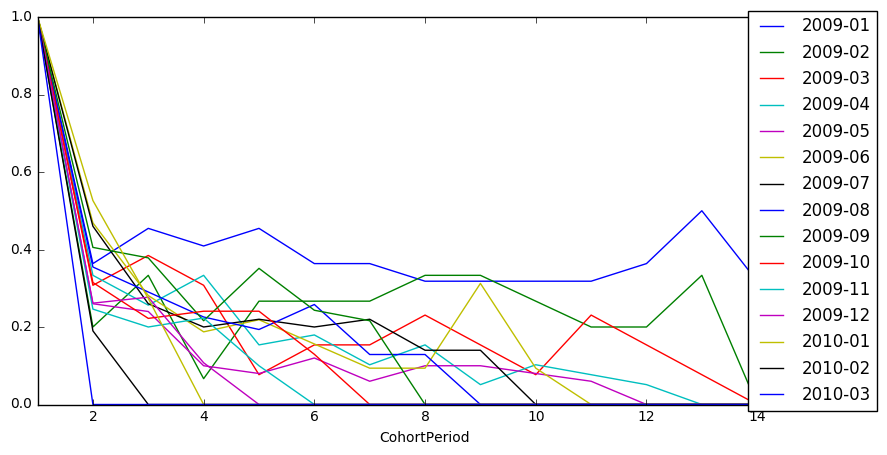

In [48]:
plotted = final.plot(x='CohortPeriod',figsize=(10,5))
plotted.legend(loc='center',bbox_to_anchor=(1.0, 0.5))

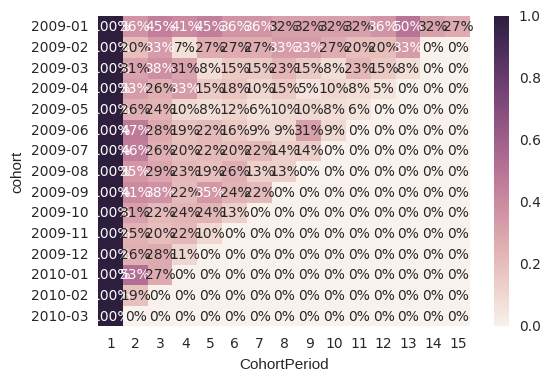

In [63]:
plot = sbn.heatmap(retention.T, mask=retention.T.isnull(), annot=True,fmt='0.0%')